# Análisis del Conjunto de Datos de Precios de Aguacate

**Conjunto de Datos de Precios de Aguacate**: El conjunto de datos "Precios de Aguacate", obtenido de Kaggle, es un conjunto de datos ampliamente utilizado para proyectos de análisis de datos y aprendizaje automático. Proporciona datos históricos sobre precios y ventas de aguacates en varias regiones de los Estados Unidos. Este conjunto de datos es valioso para entender las tendencias en los precios de los aguacates, los volúmenes de ventas y su relación con diferentes factores.

## Atributos Clave

- **Columnas**: El conjunto de datos incluye varias columnas de información. Algunas de las columnas clave típicamente encontradas en este conjunto de datos incluyen:
    - **Fecha** (`Date`): La fecha de observación.
    - **Precio Promedio** (`AveragePrice`): El precio promedio de los aguacates.
    - **Volumen Total** (`Total Volume`): El volumen total de aguacates vendidos.
    - **4046**: Volumen de aguacates Hass pequeños vendidos.
    - **4225**: Volumen de aguacates Hass grandes vendidos.
    - **4770**: Volumen de aguacates Hass extra grandes vendidos.
    - **Bolsas Totales** (`Total Bags`): Total de bolsas de aguacates vendidas.
    - **Bolsas Pequeñas** (`Small Bags`): Bolsas de aguacates pequeños vendidas.
    - **Bolsas Grandes** (`Large Bags`): Bolsas de aguacates grandes vendidas.
    - **Bolsas Extra Grandes** (`XLarge Bags`): Bolsas de aguacates extra grandes vendidas.
    - **Tipo** (`Type`): El tipo de aguacates, generalmente categorizados como convencionales u orgánicos.
    - **Región** (`Region`): La región o ciudad dentro de los Estados Unidos donde se registraron los datos.

- **Rango de Fechas**: El conjunto de datos abarca un rango de fechas, lo que permite el análisis de series de tiempo. Puedes examinar cómo cambian los precios y ventas de aguacates a lo largo de diferentes estaciones y años.

- **Regiones**: Se proporciona información para varias regiones o ciudades a través de los Estados Unidos, lo que permite el análisis de variaciones de precios y ventas en diferentes mercados.

- **Tipos**: El conjunto de datos distingue entre diferentes tipos de aguacates, como convencionales y orgánicos, lo que puede ser útil para comparar tendencias de precios entre estas categorías.

- **Volumen**: Están disponibles datos sobre el volumen total de aguacates vendidos. Esta métrica de volumen se utiliza a menudo para analizar la demanda del mercado.

- **Precio Promedio**: El conjunto de datos contiene el precio promedio de los aguacates, una métrica fundamental para entender las tendencias de precios.

## Casos de Uso

- Este conjunto de datos se utiliza comúnmente para aprender y practicar el análisis de datos, visualización de datos y modelado de regresión en proyectos de ciencia de datos y aprendizaje automático.

- Sirve como un recurso valioso para entender cómo trabajar con datos del mundo real, extraer conocimientos y tomar decisiones basadas en datos.

---

## Actividades de Análisis

### 1. **Análisis de Series Temporales**
**Resumen:** El análisis de series temporales permite identificar patrones, tendencias y estacionalidades en los precios y volúmenes de ventas de aguacates a lo largo del tiempo.


In [1]:
!pip install pandas seaborn matplotlib statsmodels numpy scikit-learn
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Carga el conjunto de datos de aguacates
avocado = pd.read_csv("avocado.csv")

print("Para una mejor interpretación del contenido de las columnas, se han renombrado según la documentación")
avocado.rename(columns={'4046': 'Small Volume', '4225': 'Large Volume', '4770': 'XLarge Volume'}, inplace=True)
print('Formatear fecha en DateTime')
avocado["Date"] = pd.to_datetime(avocado["Date"])


display(avocado.head(10))

print('info')
avocado.info()
display('describe', avocado.describe())

Para una mejor interpretación del contenido de las columnas, se han renombrado según la documentación
Formatear fecha en DateTime


,Unnamed: 0,Date,AveragePrice,Total Volume,Small Volume,Large Volume,XLarge Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     18249 non-null  int64         
 1   Date           18249 non-null  datetime64[ns]
 2   AveragePrice   18249 non-null  float64       
 3   Total Volume   18249 non-null  float64       
 4   Small Volume   18249 non-null  float64       
 5   Large Volume   18249 non-null  float64       
 6   XLarge Volume  18249 non-null  float64       
 7   Total Bags     18249 non-null  float64       
 8   Small Bags     18249 non-null  float64       
 9   Large Bags     18249 non-null  float64       
 10  XLarge Bags    18249 non-null  float64       
 11  type           18249 non-null  object        
 12  year           18249 non-null  int64         
 13  region         18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usag

'describe'

,Unnamed: 0,Date,AveragePrice,Total Volume,Small Volume,Large Volume,XLarge Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,2016-08-13 23:30:43.498273792,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
min,0.000000,2015-01-04 00:00:00,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,2015-10-25 00:00:00,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,2016-08-14 00:00:00,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,2017-06-04 00:00:00,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,2018-03-25 00:00:00,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000
std,15.481045,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938


In [3]:
print("Observación importante! Existen datasets solapados que alteran los análisis, Separamos los datos por tipo de region")

avocado['Missing Volume'] = avocado['Total Volume'] - avocado['Small Volume'] - avocado['Large Volume'] - avocado['XLarge Volume']
avocado['Missing Bags'] = (avocado['Total Bags'] - avocado['Small Bags'] - avocado['Large Bags'] - avocado['XLarge Bags']).astype(int)


avocado['region_type'] = 'local_region'
avocado.loc[avocado.region == 'TotalUS', 'region_type'] = 'wide_region'
group = ['West', 'California', 'SouthCentral', 'Northeast', 'Southeast', 'GreatLakes', 'Midsouth', 'Plains']
avocado.loc[avocado.region.isin(group), 'region_type'] = 'middle_region'
avocado.groupby('region_type')['region'].count()

avo_local = avocado.loc[avocado.region_type == 'local_region']
avo_middle = avocado.loc[avocado.region_type == 'middle_region']
avo_wide = avocado.loc[avocado.region_type == 'wide_region']

avocado.groupby('region')['Total Volume'].sum().to_csv('regiones.csv')



Observación importante! Existen datasets solapados que alteran los análisis, Separamos los datos por tipo de region


Observación importante! El cómputo de Bags es coherente, suma coincide con el total (si se trabaja en enteros solo faltan 10)


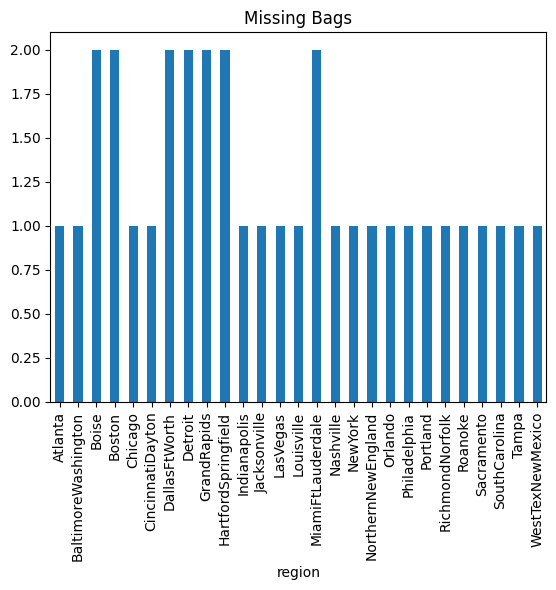

<Axes: title={'center': 'Missing Volume'}, xlabel='region'>

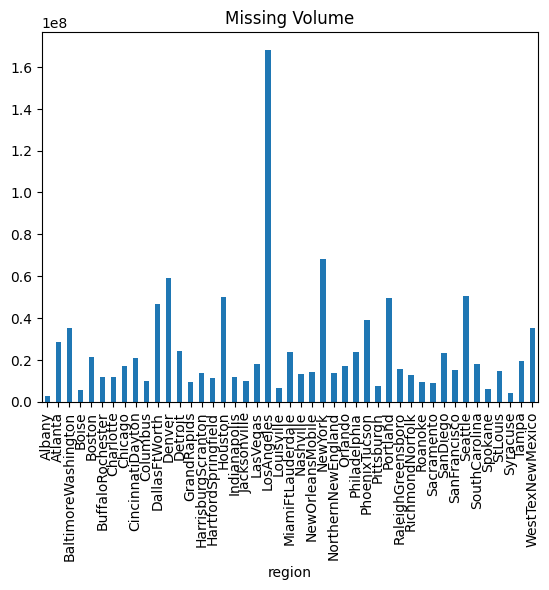

In [4]:

missing_total = sum(avo_local['Missing Bags'].values)
print(f"Observación importante! El cómputo de Bags es coherente, suma coincide con el total (si se trabaja en enteros solo faltan {missing_total})")

avo_local[avo_local['Missing Bags'] > 0 ].groupby(['region'])['Missing Bags'].sum().plot(title="Missing Bags", kind="bar")
plt.show()

avo_local.groupby(avo_local.region)['Missing Volume'].sum().plot(title="Missing Volume", kind="bar")

# avo_local.groupby([avo_local.region, avo_local.Date.dt.to_period('M')])['Missing Volume'].sum().reset_index()#.plot(title="Missing Volume")
# plt.tick_params(axis='x', rotation=90)


1. **Descomposición de Series Temporales de Precios:** 
   - **Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.



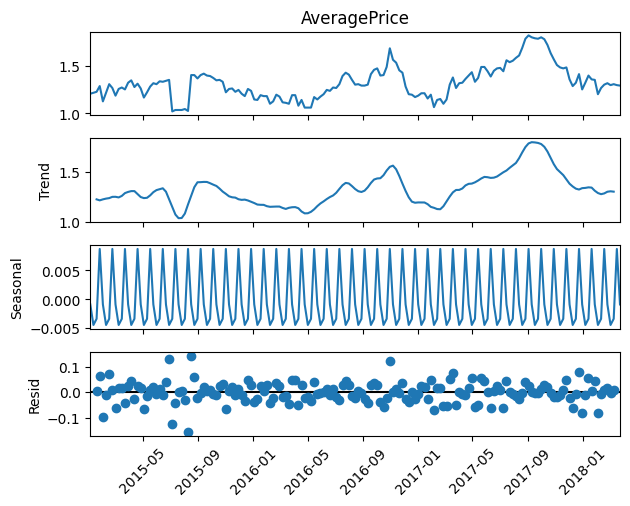

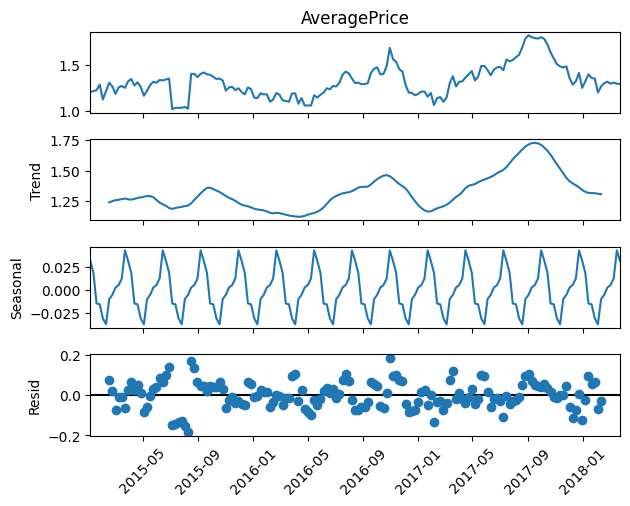

In [5]:

def seasonal_decompose(df, period=20):

    #     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
    monthly_mean = df.groupby(df.Date)["AveragePrice"].mean()

    #     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.

    # global_mean = df[["AveragePrice"]].mean().iloc[0]
    # print("Media de precio mensual de aguacates: ",global_mean)

    decompose = sm.tsa.seasonal_decompose(monthly_mean, model="additive", period=period)
    fig = decompose.plot()
    # fig, axes = plt.subplots(4, 1, figsize=(15, 7))
    plt.figsize=(15, 7)
    plt.tick_params(axis='x', rotation=45)

    # fig.suptitle('Distribución de Precio Medio por Fecha', fontsize=16)
    # decompose.observed.plot(ax=axes[0], legend=True, label="Observada")
    # decompose.trend.plot(ax=axes[1 ], legend=True, label="Tendencia")
    # decompose.seasonal.plot(ax=axes[2], legend=True, label="Estacionalidad")
    # decompose.resid.plot(ax=axes[3], legend=True, label="Residual")

    plt.show()

seasonal_decompose(avo_wide,4)
seasonal_decompose(avo_wide,12)
# seasonal_decompose(avo_middle,25)
# seasonal_decompose(avo_local,7)
# seasonal_decompose(avo_wide[avo_wide.type=='conventional'],50)
# seasonal_decompose(avo_wide[avo_wide.type=='organic'],50)


2. **Análisis de Estacionalidad por Región:** 
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.


In [6]:
# BREY


3. **Comparación de Precios Promedio Mensuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.


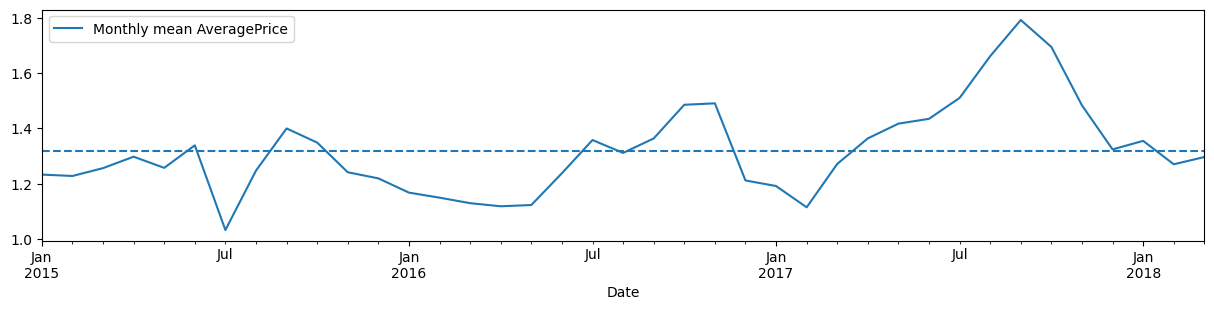

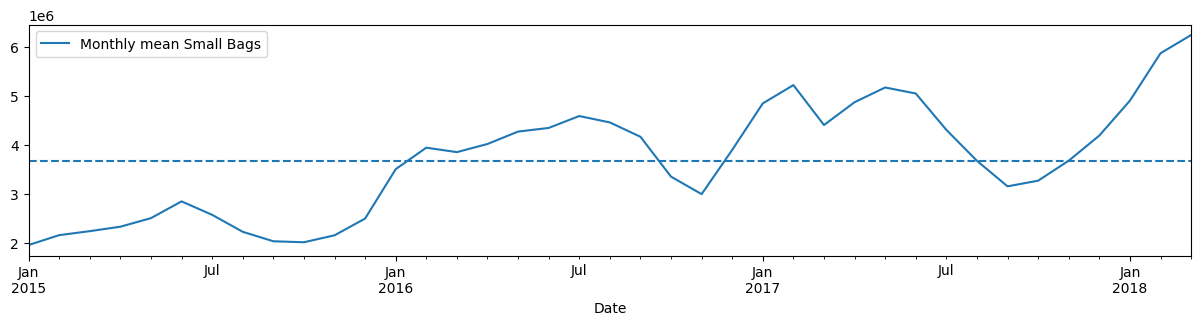

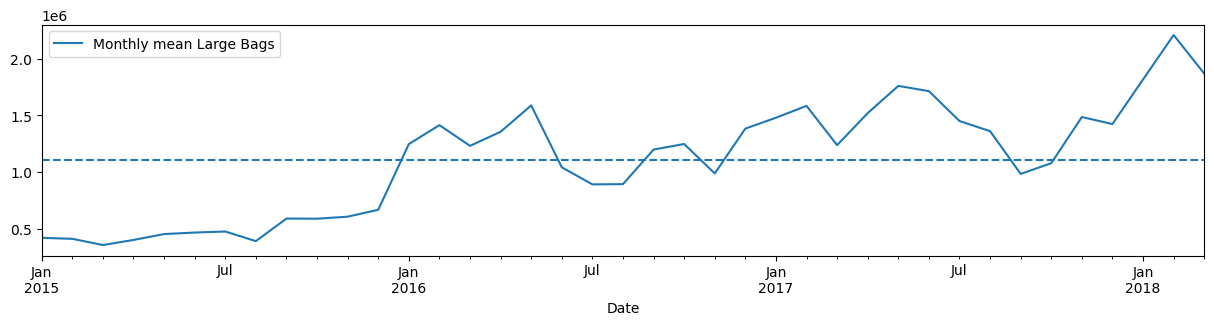

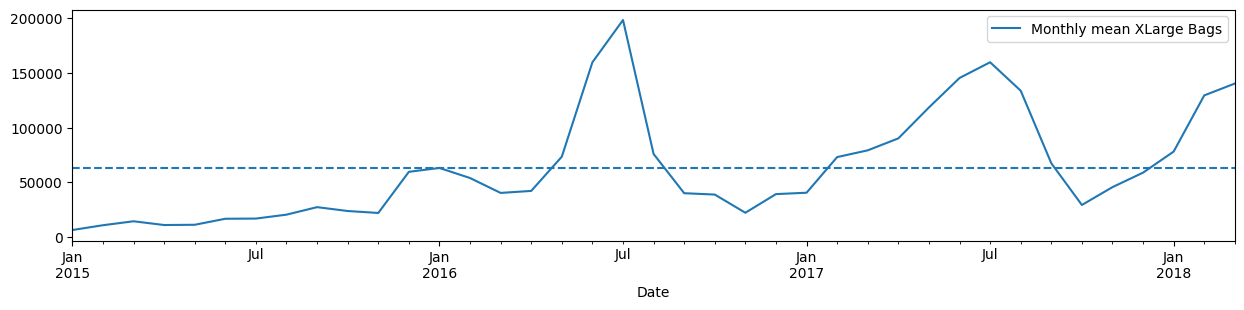

In [7]:
def monthly_average(df, field = "AveragePrice"):
    field_monthly = df.groupby(df.Date.dt.to_period("M"))[field]
    plt.figure(figsize=(15, 3))
    field_monthly.mean().plot(legend=True, label=f"Monthly mean {field}")
    global_mean = df[[field]].mean().iloc[0]
    plt.axhline(global_mean, linestyle='--', label="Media global")
    plt.show()


monthly_average(avo_wide)
monthly_average(avo_wide, 'Small Bags')
monthly_average(avo_wide, 'Large Bags')
monthly_average(avo_wide, 'XLarge Bags')
# monthly_average(avo_middle)   
# monthly_average(avo_local)



4. **Tendencia de Ventas a lo Largo del Tiempo:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.



Observacion Importante! bajada de precio alrededor de febrero, posiblemente debido a picos de venta


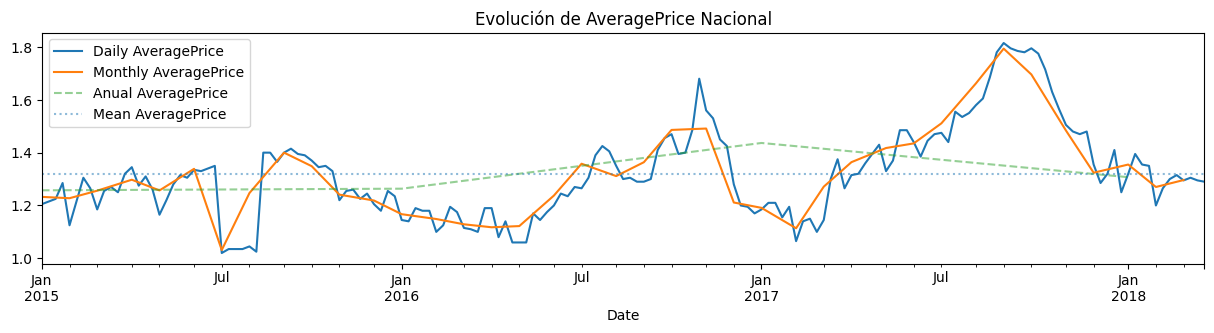

Observacion Importante! Posible error en AveragePrice de tipo organic de julio 2015 son incoherentes entre Nacional (1.00) y el resto de datasets Regional (1.71) y local (1.76)


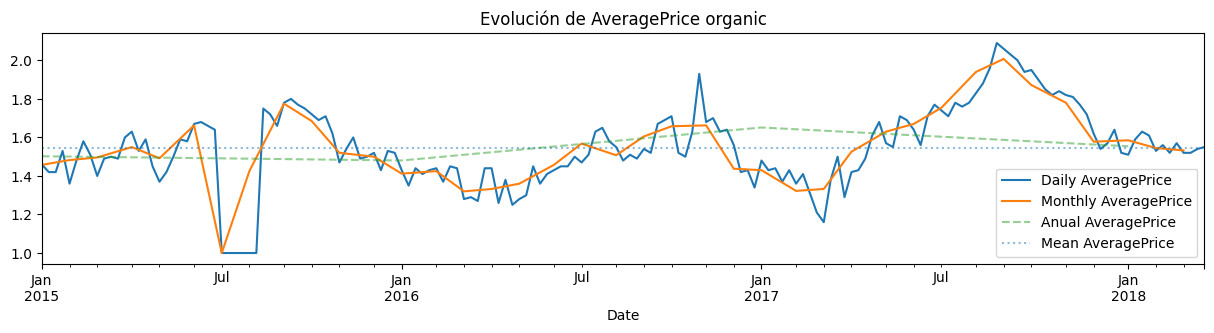

Observacion Importante! se observa un incremento de volumen de tipo organico


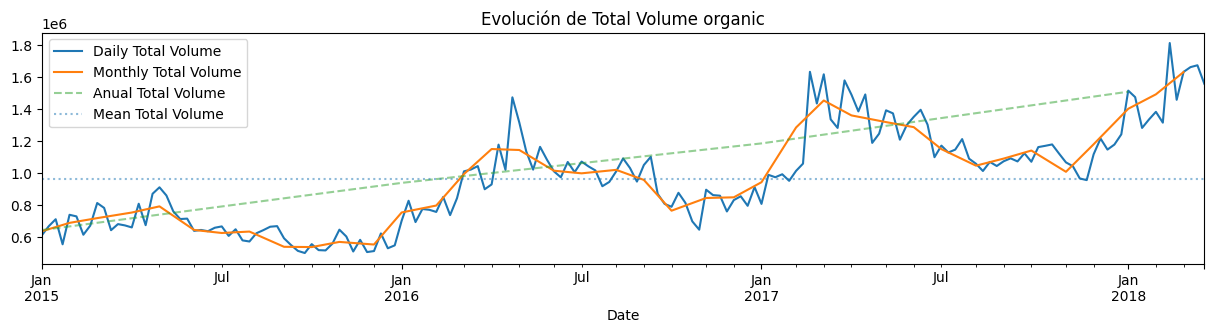

Observacion Importante! Pico de volumen a principios de febrero y mayo ['2018-02-04', '2017-02-05', '2016-02-07', '2017-05-07', '2016-05-08', '2015-02-01']


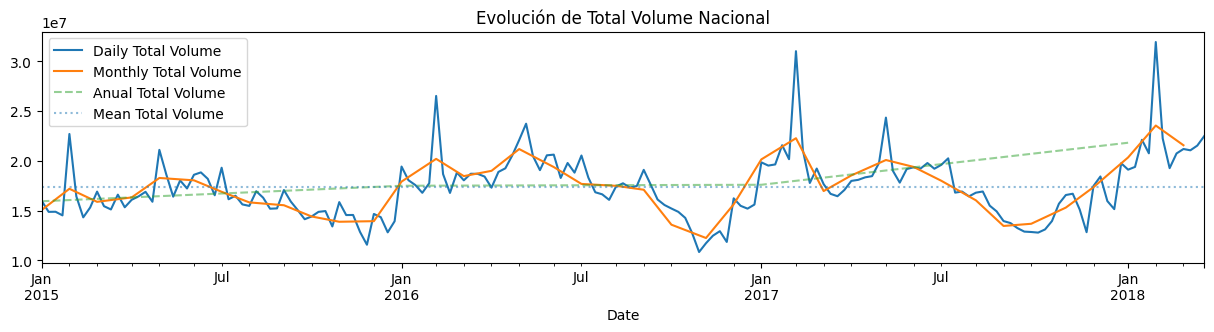

Observacion Importante! se dispara en verano la venta de XLarge Bags a partir de 2016


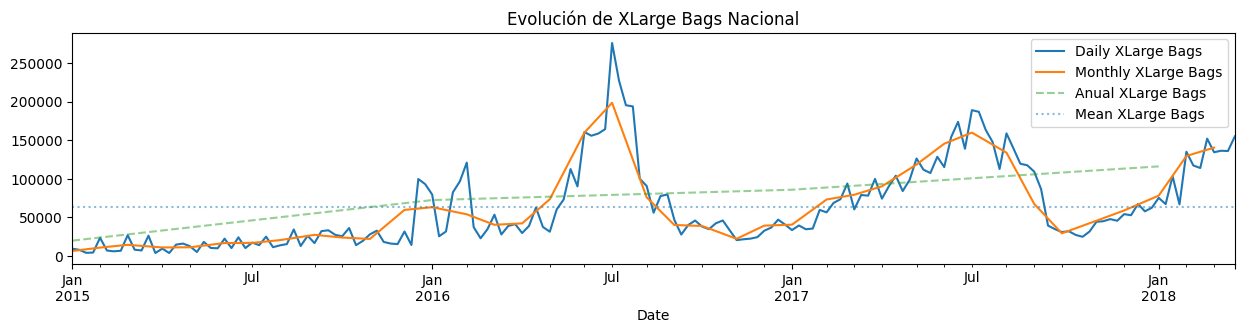

Observacion Importante! No se vendieron XLarge Bags de tipo organic hasta agosto de 2017


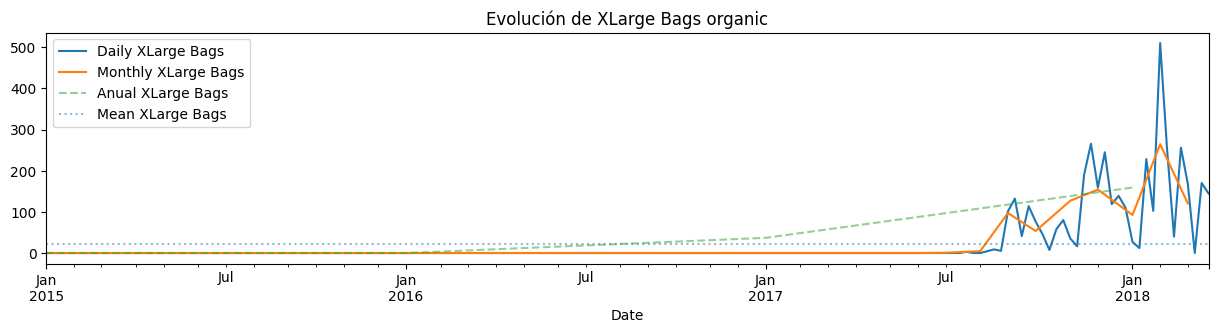

In [8]:
def daily_average(df, field, title=''):

    field_bydate = df.groupby(avocado.Date)[field]
    field_monthly = df.groupby(df.Date.dt.to_period("M"))[field]
    field_yearly = df.groupby(df.Date.dt.to_period("Y"))[field]
    global_mean = df[[field]].mean().iloc[0]
    plt.figure(figsize=(15, 3))
    field_bydate.mean().plot(label=f"Daily {field}")
    field_monthly.mean().plot(label=f"Monthly {field}")
    field_yearly.mean().plot(label=f"Anual {field}", linestyle='--', alpha=0.5)
    plt.axhline(global_mean, label=f"Mean {field}" , linestyle=':', alpha=0.5 )
    plt.title(f'Evolución de {field} {title}')
    plt.legend()
    plt.show()


print("Observacion Importante! bajada de precio alrededor de febrero, posiblemente debido a picos de venta")
daily_average(avo_wide, "AveragePrice", 'Nacional')

AveragePrice_mean_july_wide = avo_wide[(avo_wide.type=='organic') & (avo_wide.Date > '2015-06-28') & (avo_wide.Date < '2015-08-16')]['AveragePrice'].mean()
AveragePrice_mean_july_local = avo_local[(avo_local.type=='organic') & (avo_local.Date > '2015-06-28') & (avo_local.Date < '2015-08-16')]['AveragePrice'].mean()
AveragePrice_mean_july_middle = avo_middle[(avo_middle.type=='organic') & (avo_middle.Date > '2015-06-28') & (avo_middle.Date < '2015-08-16')]['AveragePrice'].mean()
print(f"Observacion Importante! Posible error en AveragePrice de tipo organic de julio 2015 son incoherentes entre Nacional ({AveragePrice_mean_july_wide:.2f}) y el resto de datasets Regional ({AveragePrice_mean_july_middle:.2f}) y local ({AveragePrice_mean_july_local:.2f})")
daily_average(avo_wide[avo_wide.type=='organic'], 'AveragePrice', 'organic')

print("Observacion Importante! se observa un incremento de volumen de tipo organico")
daily_average(avo_wide[avo_wide.type=='organic'], 'Total Volume', 'organic')

picos = avo_wide.groupby(avo_wide.Date)['Total Volume'].sum().reset_index().sort_values(by='Total Volume', ascending=False).head(6)['Date'].astype(str).tolist()
print(f"Observacion Importante! Pico de volumen a principios de febrero y mayo {picos}")
daily_average(avo_wide, 'Total Volume', 'Nacional')

print("Observacion Importante! se dispara en verano la venta de XLarge Bags a partir de 2016")
daily_average(avo_wide, 'XLarge Bags', 'Nacional')

print("Observacion Importante! No se vendieron XLarge Bags de tipo organic hasta agosto de 2017")
daily_average(avo_wide[avo_wide.type=='organic'], 'XLarge Bags', 'organic')




5. **Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.



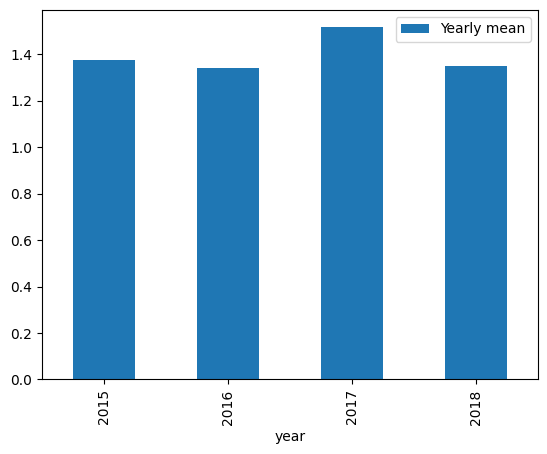

In [9]:
AveragePrice_yearly = avocado.groupby(avocado.year)["AveragePrice"]
AveragePrice_yearly.mean().plot(legend=True, label="Yearly mean", kind="bar")
plt.show()

### 2. **Gráficos para Visualización de Datos**
**Resumen:** La visualización de datos es clave para identificar patrones y relaciones entre diferentes variables. Los gráficos apropiados pueden proporcionar información valiosa sobre el comportamiento de los precios y volúmenes de ventas.

1. **Gráfico de Violín de Volumen de Ventas por Región:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `region`.
   - **Esperado:** Visualiza la distribución de ventas en diferentes regiones.
     - Utiliza la función `violinplot` de `seaborn` para crear gráficos de violín.
     - Configura los ejes para mostrar la relación entre `Total Volume` y `region`.
     - Añade etiquetas y títulos usando `plt.title()` y `plt.xlabel()` para facilitar la interpretación.



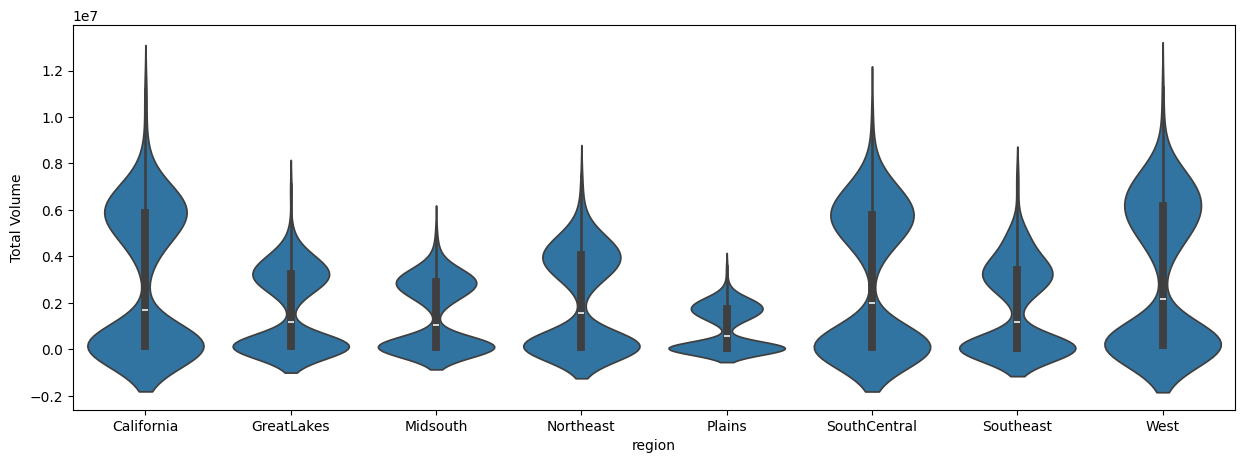

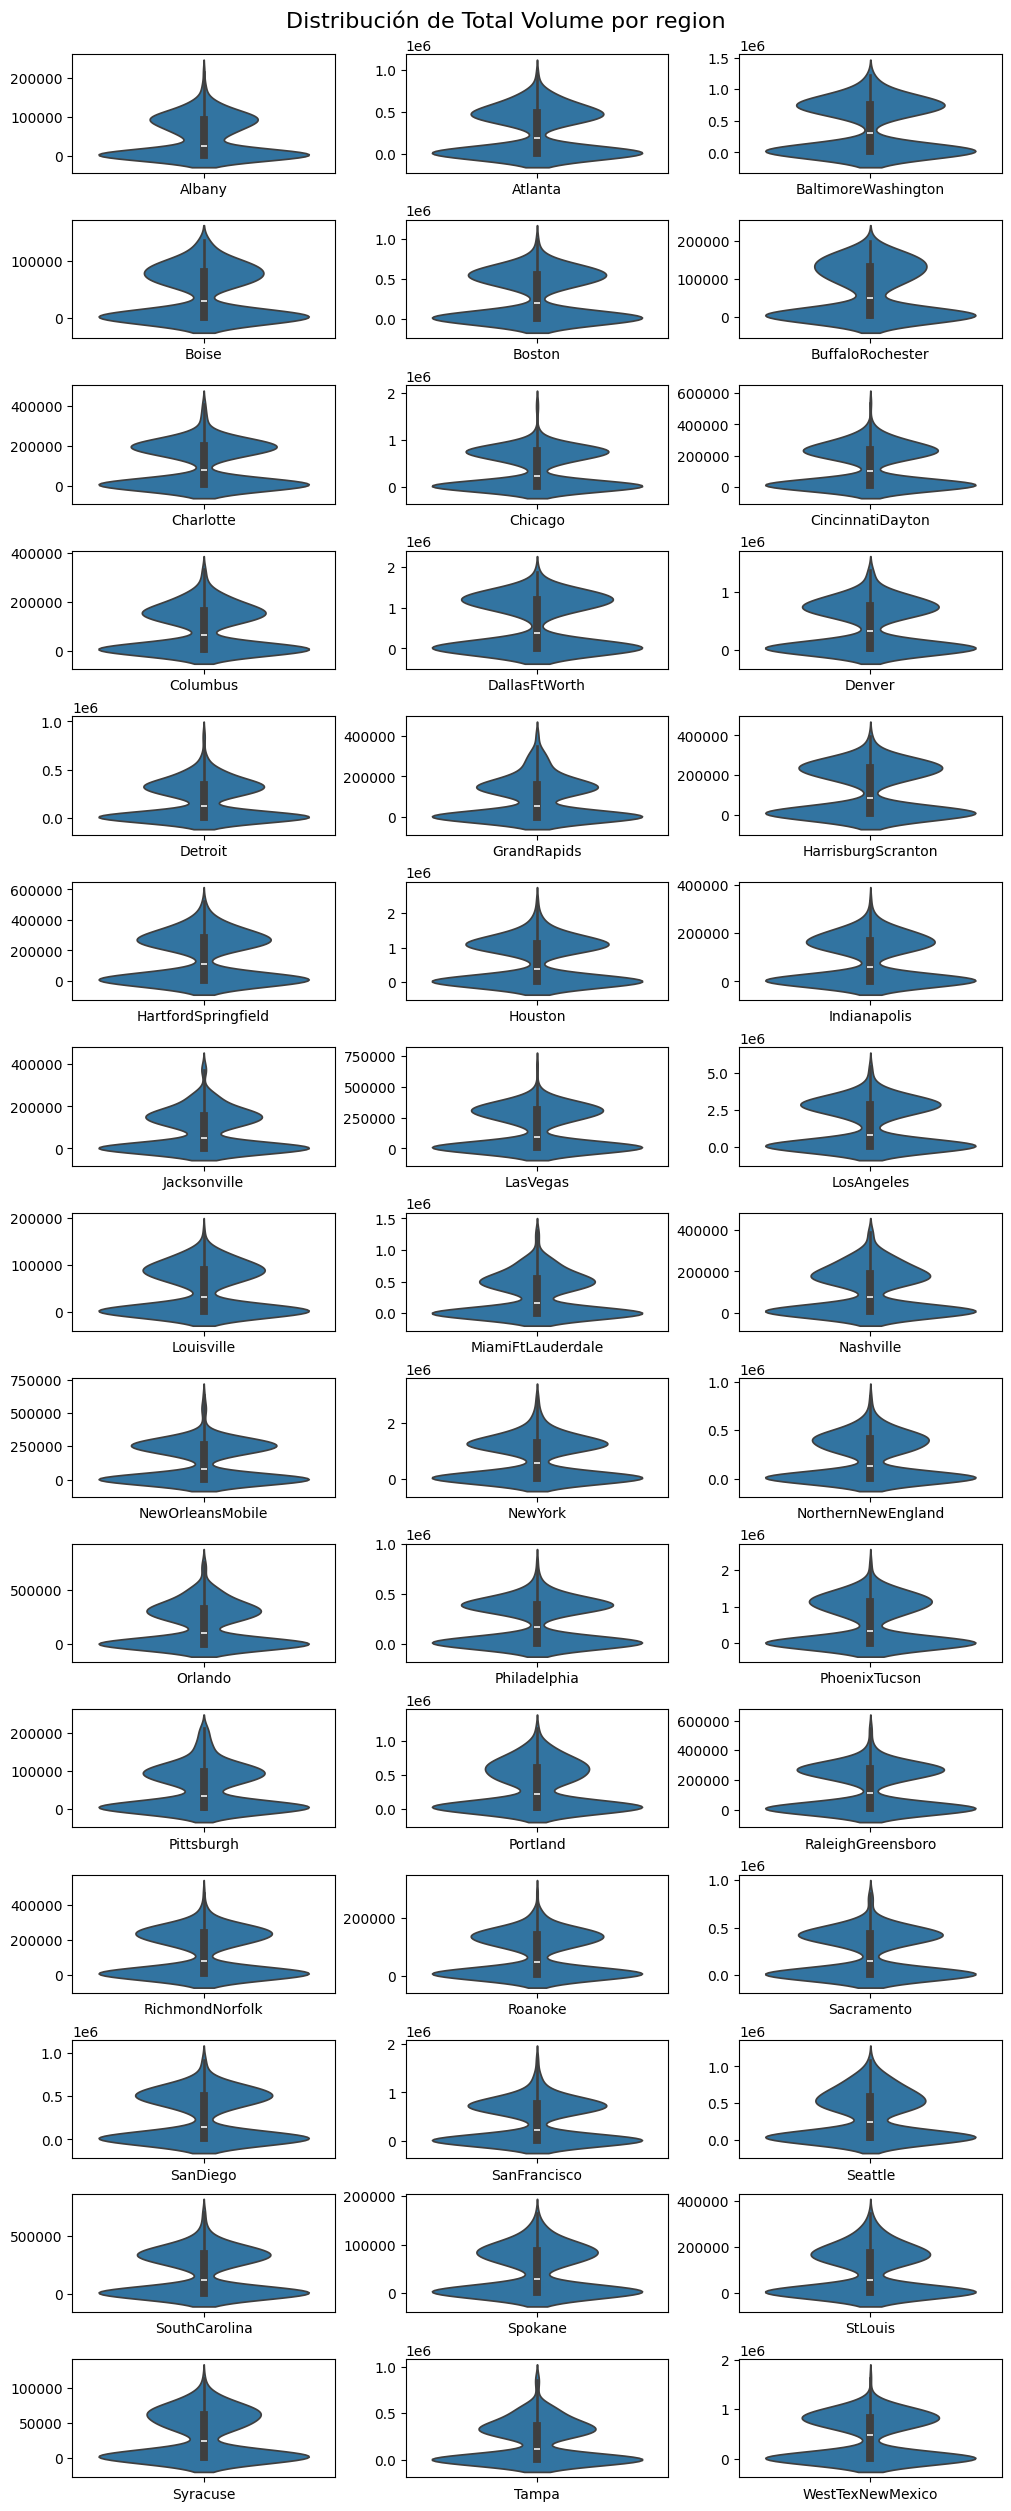

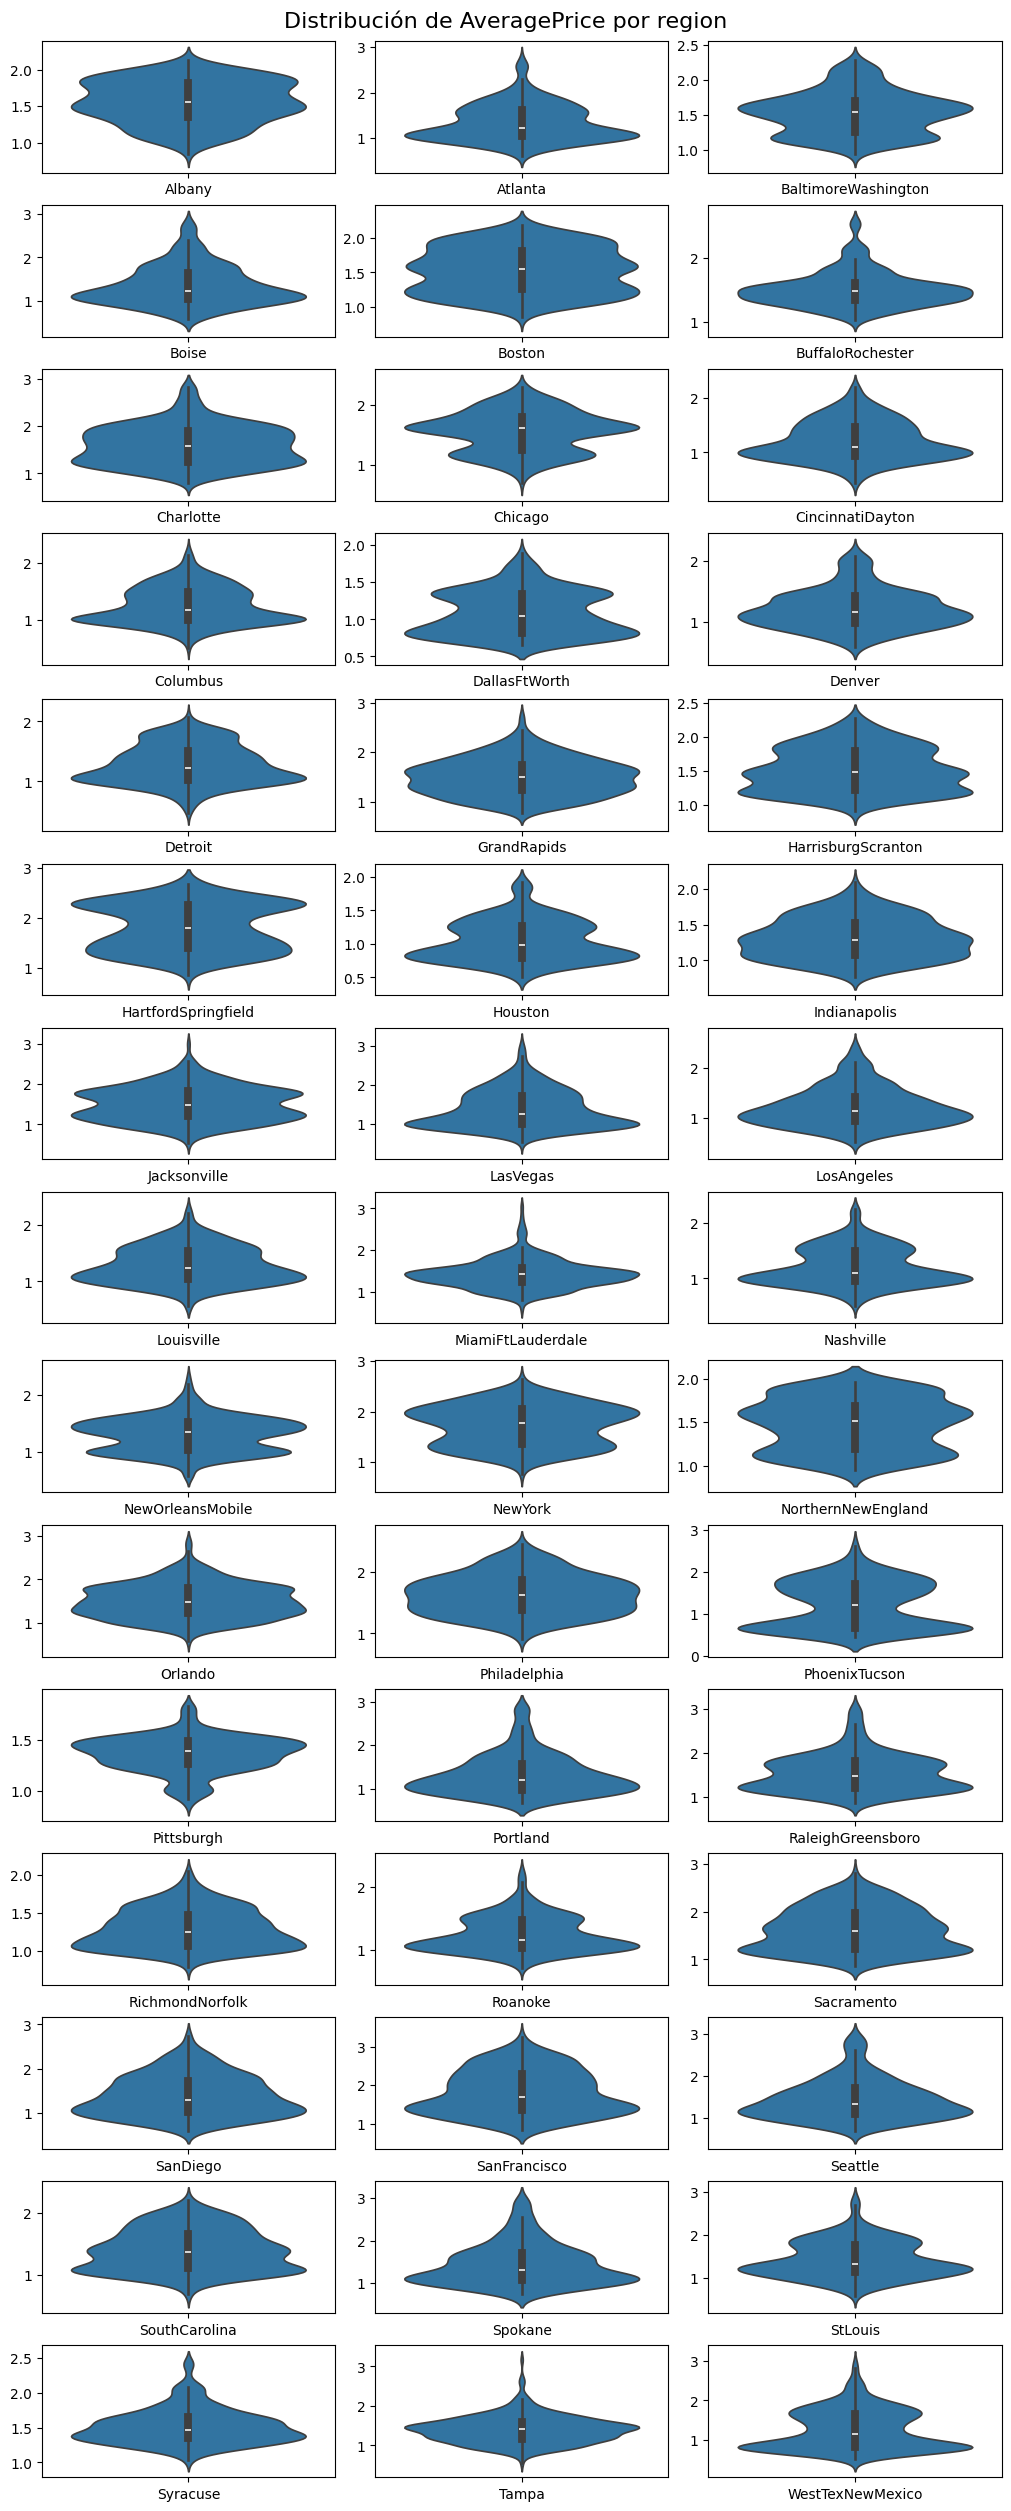

In [10]:
def violin_dist(df, grouper, field):

    groups = df[grouper].unique()

    # Definir el número de filas y columnas para la cuadrícula
    n_cols = 3  # número de columnas
    n_rows = int(np.ceil(len(groups) / n_cols))  # calcular el número de filas

    # Crear una figura grande para contener todos los subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 25), constrained_layout=True)

    # Aplanar el array de ejes para poder iterar fácilmente
    axes = axes.flatten()
    # Crear un gráfico por cada región
    for i, item in enumerate(groups):
        # Filtrar los datos por región
        groups_data = df[df[grouper] == item]
        
        # Crear el violinplot para la región
        sns.violinplot(x=groups_data[grouper], y=groups_data[field], ax=axes[i], density_norm="width")
        
        # Establecer el título del gráfico como el nombre de la región
        # axes[i].set_title(item)
        axes[i].set(xlabel=None, ylabel=None)
        # Rotar etiquetas del eje X si es necesario (aunque solo hay una por gráfico)
        # axes[i].tick_params(axis='x', rotation=90)

    # Eliminar cualquier gráfico vacío si hay más subplots que regiones
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    # Mostrar la gráfica

    fig.suptitle(f'Distribución de {field} por {grouper}', fontsize=16)
    plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(data=avo_middle ,x='region', y='Total Volume', density_norm="width")
plt.show()

violin_dist(avo_local, "region", 'Total Volume')
violin_dist(avo_local, "region", 'AveragePrice')



2. **Boxplot Comparativo de Precios entre Años:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Genera boxplots para comparar la distribución de precios.
     - Utiliza `boxplot` de `seaborn` para crear boxplots que comparen `AveragePrice` entre diferentes años.
     - Asegúrate de que cada boxplot represente un año diferente.
     - Incluye etiquetas y títulos descriptivos usando `plt.title()`.


3. **Histograma de Volumen Total de Ventas:**
   - **Uso de Datos:** Usa la columna `Total Volume`.
   - **Esperado:** Crea un histograma para mostrar la distribución del volumen total de ventas.
     - Utiliza `hist()` de `matplotlib` para crear el histograma.
     - Ajusta el número de bins para una visualización clara usando el parámetro `bins`.
     - Añade etiquetas y un título que describa lo que se muestra.



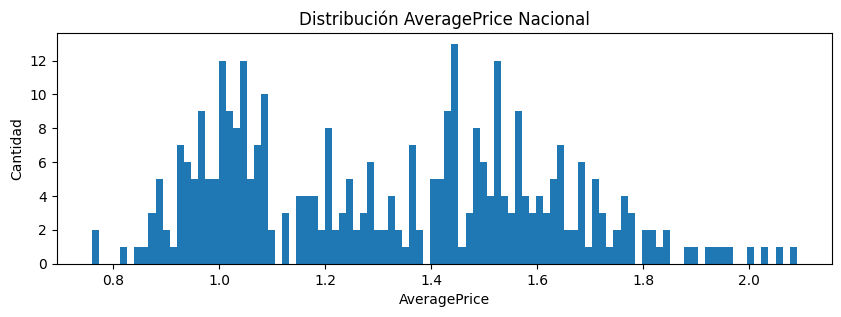

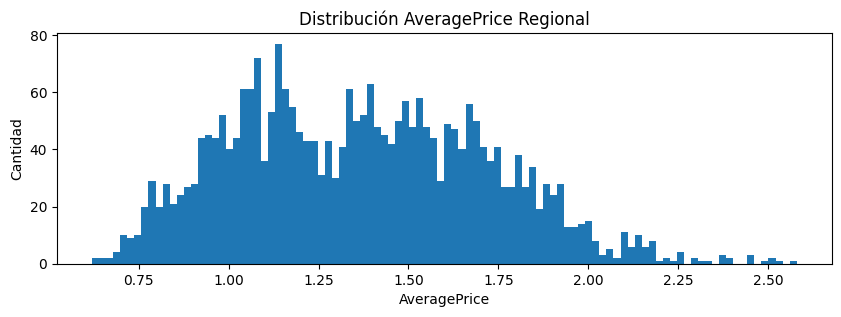

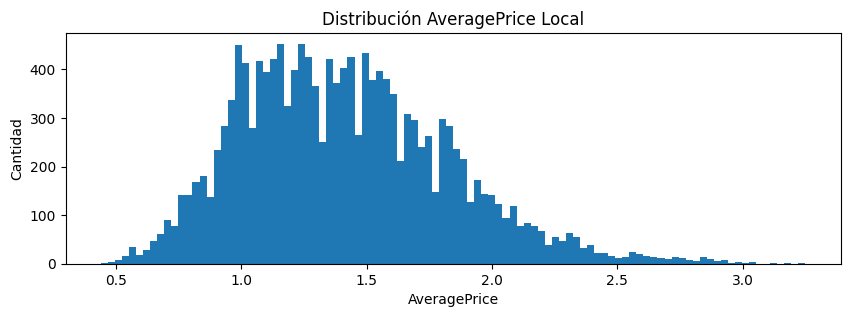

In [11]:
def total_volume_dist(df, field, title, log=True):

    plt.figure(figsize=(10, 3))
    plt.title(f'Distribución {field} {title}')
    plt.xlabel(field)
    plt.ylabel("Cantidad")
    plt.hist(df[field], bins=100, log=log)
    plt.show()

# total_volume_dist(avo_wide,"Total Volume", "Nacional", True)
# total_volume_dist(avo_middle,"Total Volume", "Regional", True)
# total_volume_dist(avo_local,"Total Volume", "Local", True)
total_volume_dist(avo_wide,"AveragePrice", "Nacional", False)
total_volume_dist(avo_middle,"AveragePrice", "Regional", False)
total_volume_dist(avo_local,"AveragePrice", "Local", False)


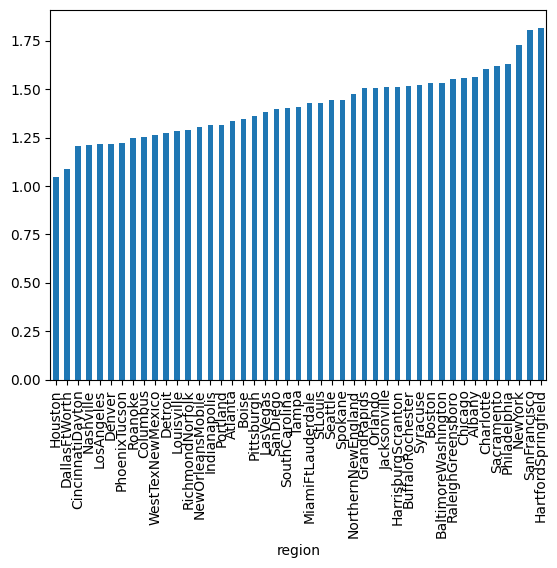

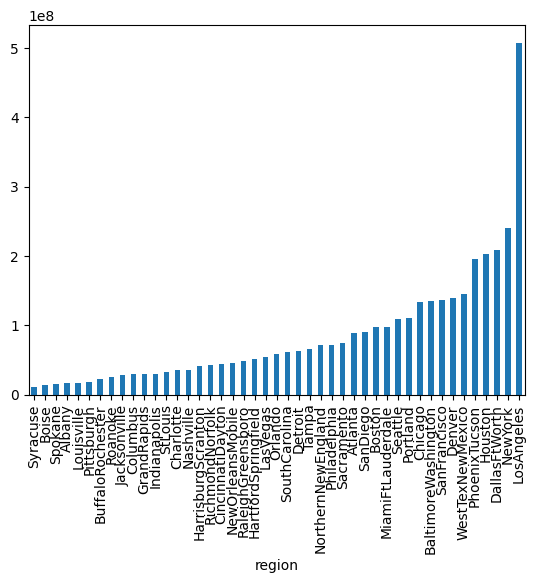

In [12]:
avo_local.groupby('region')['AveragePrice'].mean().sort_values().plot(kind='bar')
plt.show()

avo_local.groupby('region')['Total Volume'].sum().sort_values().plot(kind='bar')
plt.show()

4. **Gráfico de Barras de Ventas por Tipo de Bolsa:**
   - **Uso de Datos:** Utiliza las columnas `Total Bags`, `Small Bags`, `Large Bags` y `XLarge Bags`.
   - **Esperado:** Compara las ventas de diferentes tipos de bolsas.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `sum()`.
     - Crea un gráfico de barras con `plt.bar()` para mostrar las diferencias en ventas.
     - Asegúrate de incluir etiquetas para cada tipo de bolsa.



5. **Gráfico de Líneas de Precios Promedios por Año:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice` y `year`.
   - **Esperado:** Visualiza la tendencia de precios promedio a lo largo de los años.
     - Agrupa los datos por `year` y calcula el promedio de `AveragePrice`.
     - Usa `plt.plot()` para crear un gráfico de líneas que muestre la evolución de precios.
     - Añade un título y etiquetas descriptivas a los ejes usando `plt.title()` y `plt.xlabel()`.



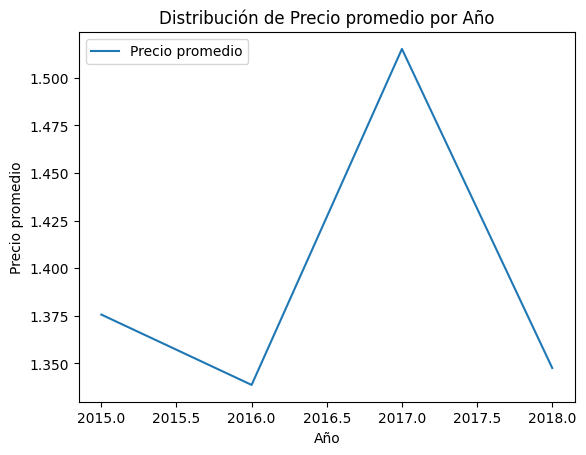

In [13]:
AveragePrice_yearly.mean().plot(legend=True, label="Precio promedio")
plt.title("Distribución de Precio promedio por Año")
plt.xlabel("Año")
plt.ylabel("Precio promedio")
plt.show()


### 3. **Elasticidad del Precio**
**Resumen:** El análisis de elasticidad precio-demanda permite evaluar cómo los cambios en los precios afectan la demanda de aguacates. Comprender la elasticidad puede ayudar a formular estrategias de precios más efectivas.

La fórmula de elasticidad precio-demanda es:

$$
E_d = \frac{\% \text{Cambio en la cantidad demandada}}{\% \text{Cambio en el precio}} = \frac{\Delta Q / Q}{\Delta P / P}
$$

1. **Elasticidad Precio-Demanda por Año:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda para cada año.
     - Calcula la variación porcentual de `Total Volume` y `AveragePrice` utilizando `pd.pct_change()`.
     - Utiliza la fórmula de elasticidad para determinar la sensibilidad de la demanda respecto al precio.
     - Presenta los resultados en un gráfico de líneas usando `plt.plot()` para mostrar la elasticidad por año.




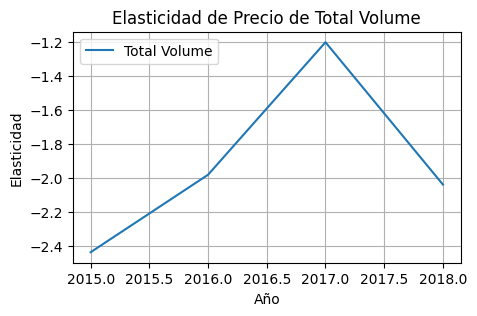

In [187]:
def get_price_elasticity(df, field):
    # Calcular la variación porcentual para el Volumen y AveragePrice
    field_pct_change = df[field].pct_change().dropna()
    Price_pct_change = df['AveragePrice'].pct_change().dropna()
    Elasticity = 'Elasticity '+field
    # Calcular la elasticidad del precio de la demanda
    Elasticity = field_pct_change / Price_pct_change

    # Limpieza de datos inf , -inf  y NaN
    return Elasticity.replace([float('inf'), float('-inf')], pd.NA).dropna()
   

def elasticity_anual(df, field):
    elac_field_name = 'Elasticity '+field
    df[elac_field_name] = get_price_elasticity(df, field)

    # Agrupar por año y calcular la elasticidad promedio por año
    avocado_elasticity_by_year = df.groupby('year')[elac_field_name].mean().reset_index()

    # Graficar la elasticidad por año
    plt.plot(avocado_elasticity_by_year['year'], avocado_elasticity_by_year[elac_field_name], label=field)
    plt.title(f'Elasticidad de Precio de {field}')
    plt.xlabel('Año')
    plt.ylabel('Elasticidad')
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(5, 3))
elasticity_anual(avo_wide, 'Total Volume')
# elasticity_anual(avo_middle, 'Total Volume')
# elasticity_anual(avo_local, 'Total Volume')
plt.show()


2. **Comparación de Elasticidad en Diferentes Mercados:**
   - **Uso de Datos:** Utiliza las columnas `Total Volume` y `AveragePrice`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda en diferentes regiones.
     - Agrupa los datos por `region` y calcula la elasticidad para cada región utilizando `pd.pct_change()`.
     - Presenta un gráfico de barras que muestre la elasticidad por región usando `plt.bar()`.



3. **Elasticidad a Nivel de Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Bags`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda específica para cada tipo de bolsa.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `groupby()` y `sum()`.
     - Calcula la elasticidad para cada tipo y presenta los resultados en un gráfico comparativo usando `plt.bar()`.




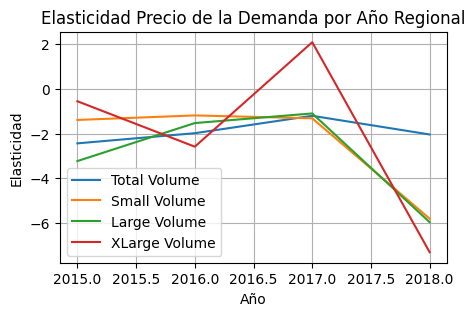

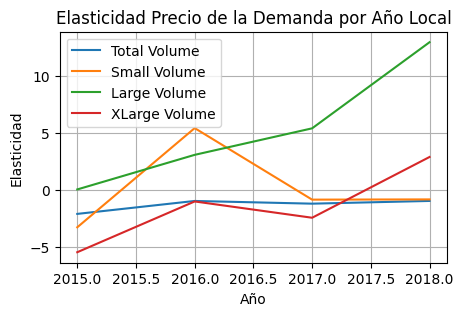

In [52]:
plt.figure(figsize=(5, 3))
elasticity_anual(avo_wide, 'Total Volume')
elasticity_anual(avo_wide, 'Small Volume')
elasticity_anual(avo_wide, 'Large Volume')
elasticity_anual(avo_wide, 'XLarge Volume')
plt.title('Elasticidad Precio de la Demanda por Año Regional')

plt.show()

plt.figure(figsize=(5, 3))
elasticity_anual(avo_local, 'Total Volume')
elasticity_anual(avo_local, 'Small Volume')
elasticity_anual(avo_local, 'Large Volume')
elasticity_anual(avo_local, 'XLarge Volume')
plt.title('Elasticidad Precio de la Demanda por Año Local')
plt.show()

Observacion Importante! alteraciones en la elasticidad de la demanda por la variación del precio en algunas ciudades


,region,year,Elasticity Total Volume
83,LosAngeles,2018,1087.886618
5,Atlanta,2016,520.532073
61,HartfordSpringfield,2016,383.012597


,region,year,Elasticity Total Volume
20,BuffaloRochester,2015,-1077.072247
19,Boston,2018,-806.787825
88,MiamiFtLauderdale,2015,-592.562719


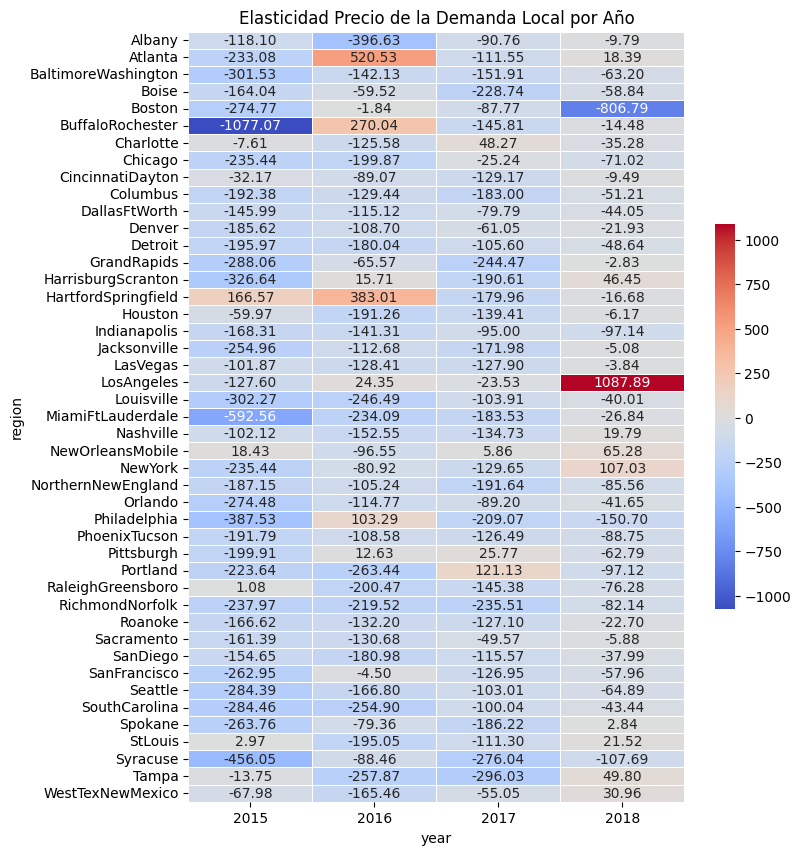

In [204]:
print("Observacion Importante! alteraciones en la elasticidad de la demanda por la variación del precio en algunas ciudades")

avo_local['Elasticity Total Volume'] = get_price_elasticity(avo_local, 'Total Volume')


elas_gp = avo_local.groupby(['region', 'year'])['Elasticity Total Volume'].sum().astype(float).reset_index()

display(elas_gp.sort_values(by='Elasticity Total Volume', ascending=False).head(3))
display(elas_gp.sort_values(by='Elasticity Total Volume', ascending=True).head(3))

elas_pt = elas_gp.pivot(index='region', columns='year', values='Elasticity Total Volume')


fig = plt.figure(figsize=(8, 10))
sns.heatmap(elas_pt, annot=True, cmap='coolwarm' , linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f')
plt.title('Elasticidad Precio de la Demanda Local por Año')
plt.show()



4. **Análisis de Elasticidad Comparativa entre Orgánicos y Convencionales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `type`.
   - **Esperado:** Compara la elasticidad de la demanda entre aguacates orgánicos y convencionales.
     - Agrupa los datos por `type` y calcula la elasticidad utilizando `pd.pct_change()`.
     - Presenta un gráfico que muestre la diferencia en elasticidad entre los dos tipos usando `plt.bar()`.




5. **Análisis de la Elasticidad Precios-Ventas:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Examina cómo las variaciones en `AveragePrice` afectan a `Total Volume`.
     - Realiza un análisis de la relación entre estas dos variables calculando la elasticidad.
     - Presenta un gráfico de dispersión que muestre la relación y discute la tendencia observada utilizando `plt.scatter()` y `plt.plot()`.



Observacion Importante! existe un consumo orientado a comprar mayor volumen a un precio más bajo, pero tambien hay un consumo de poco volumen a precios medios


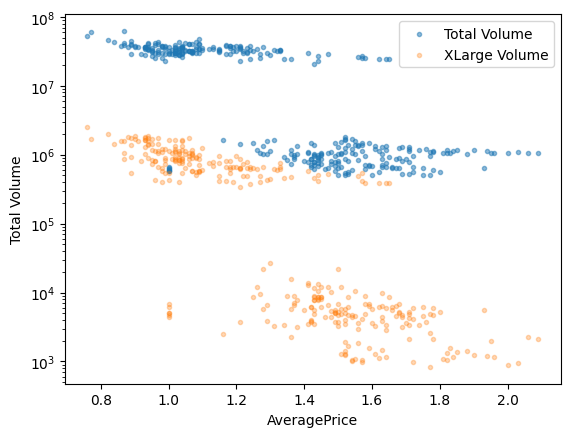

In [43]:

data=avo_wide
print("Observacion Importante! existe un consumo orientado a comprar mayor volumen a un precio más bajo, pero tambien hay un consumo de poco volumen a precios medios")
plt.scatter(data=data, x='AveragePrice', y='Total Volume', marker='.', alpha=0.5)
#plt.scatter(data=data, x='AveragePrice', y='Small Volume', marker='.', alpha=0.4)
#plt.scatter(data=data, x='AveragePrice', y='Large Volume', marker='.', alpha=0.3)
plt.scatter(data=data, x='AveragePrice', y='XLarge Volume', marker='.', alpha=0.3)
plt.legend()
plt.xlabel('AveragePrice')
plt.ylabel('Total Volume')
plt.yscale('log')
plt.show()

# avocado[avocado['AveragePrice'] == 1.0]


### 4. **Análisis de Cohortes**
**Resumen:** El análisis de cohortes permite agrupar datos según características específicas y observar cómo se comportan a lo largo del tiempo. Se centra en cohortes de precios y ventas para entender las dinámicas del mercado.

1. **Cohortes Basadas en Precios Promedios Trimestrales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `Date`.
   - **Esperado:** Crea cohortes trimestrales y analiza cambios en precios y volúmenes.
     - Agrupa los datos por trimestre usando `pd.Grouper` con `freq='Q'`.
     - Calcula el promedio de `AveragePrice` y suma `Total Volume` para cada cohorte.
     - Visualiza los resultados en un gráfico de líneas que muestre la evolución de las cohortes.



In [317]:
print('Definimos las cohortes')
avocado['Quarter'] = avocado.Date.dt.to_period('Q')


Definimos las cohortes


In [320]:
def quarter_average_price_dist(df, grouper, title):

    x = df[grouper].dt.strftime('%Y-Q%q').unique()
    y1 = df.groupby(grouper)['AveragePrice'].mean()
    y2 = df.groupby(grouper)['Total Volume'].sum()

    fig, ax1 = plt.subplots()

    ax1.plot(x, y1, color='b')
    ax1.set_ylabel('AveragePrice', color='b')
    ax1.set_xlabel(grouper)
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.tick_params(axis='x', rotation=45)

    ax2 = ax1.twinx()
    ax2.plot(x, y2, color='r')
    ax2.set_ylabel('Total Volume', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    plt.title(title)
    plt.show()


quarter_average_price_dist(avo_local, 'Quarter', 'AveragePrice vs. Total Volume')
# quarter_average_price_dist(avo_local[avo_local.region == 'Albany'], 'AveragePrice vs. Total Volume en Albany')
# quarter_average_price_dist(avo_local[avo_local.type == 'conventional'], 'AveragePrice vs. Total Volume type conventional')
# quarter_average_price_dist(avo_local[avo_local.type == 'organic'], 'AveragePrice vs. Total Volume type organic')

KeyError: 'Quarter'

2. **Cohortes por Región y Fecha:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice`, `Total Volume`, `region` y `Date`.
   - **Esperado:** Analiza cómo varían las cohortes de diferentes regiones.
     - Agrupa los datos por `region` y `Date` usando `groupby()`.
     - Calcula el promedio de precios y volumen para cada cohorte.
     - Presenta los resultados en gráficos de barras que muestren comparaciones entre regiones.



3. **Análisis de Cohortes en Función del Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags` y `Date`.
   - **Esperado:** Examina cómo se comportan las diferentes cohortes según el tipo de bolsa.
     - Agrupa los datos por tipo de bolsa y `Date`.
     - Calcula el volumen de ventas total y muestra los resultados en un gráfico de líneas.



<Axes: xlabel='Date'>

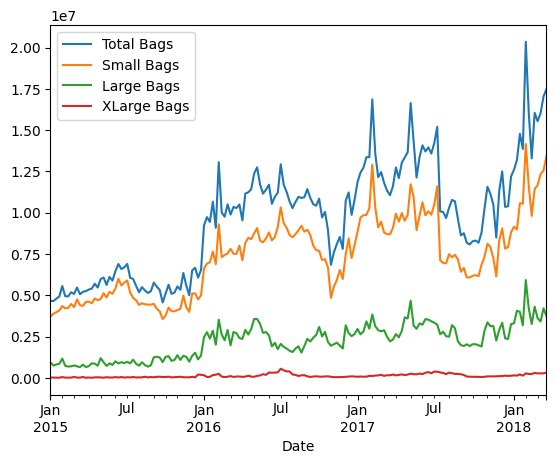

In [308]:
avo_wide.groupby('Date')[['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].sum().plot()



4. **Cohortes de Clientes Basadas en Ventas:**
   - **Uso de Datos:** Usa las columnas `Total Volume`, `Date` y `region`.
   - **Esperado:** Analiza el comportamiento de las cohortes según el volumen de ventas.
     - Clasifica los clientes según su volumen de compras.
     - Visualiza las cohortes en gráficos de líneas o barras que muestren el comportamiento de compra a lo largo del tiempo.



5. **Evaluación de Retención de Ventas por Cohorte:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Estudia cómo se retienen las ventas en cohortes a lo largo de un año.
     - Agrupa los datos por mes y cohortes.
     - Calcula la retención de ventas y visualiza los resultados en un gráfico de líneas que muestre las tasas de retención.




,Unnamed: 0,Date,AveragePrice,Total Volume,Small Volume,Large Volume,XLarge Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_type,Quarter,Cohorte
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,local_region,2015Q4,2015-01-04
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,local_region,2015Q4,2015-01-04
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,local_region,2015Q4,2015-01-04
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,local_region,2015Q4,2015-01-04
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,local_region,2015Q4,2015-01-04


,Cohorte,Date,Num_Clientes
0,2015-01-04,2015-01-04,45
1,2015-01-04,2015-01-11,45
2,2015-01-04,2015-01-18,45
3,2015-01-04,2015-01-25,45
4,2015-01-04,2015-02-01,45
...,...,...,...
164,2015-01-04,2018-02-25,45
165,2015-01-04,2018-03-04,45
166,2015-01-04,2018-03-11,45
167,2015-01-04,2018-03-18,45


,Date,Num_Clientes
Cohorte,,
2015-01-04,2015-01-04,45


Date,2015-01-04,2015-01-11,2015-01-18,2015-01-25,2015-02-01,2015-02-08,2015-02-15,2015-02-22,2015-03-01,2015-03-08,...,2018-01-21,2018-01-28,2018-02-04,2018-02-11,2018-02-18,2018-02-25,2018-03-04,2018-03-11,2018-03-18,2018-03-25
Cohorte,,,,,,,,,,,,,,,,,,,,,
2015-01-04,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


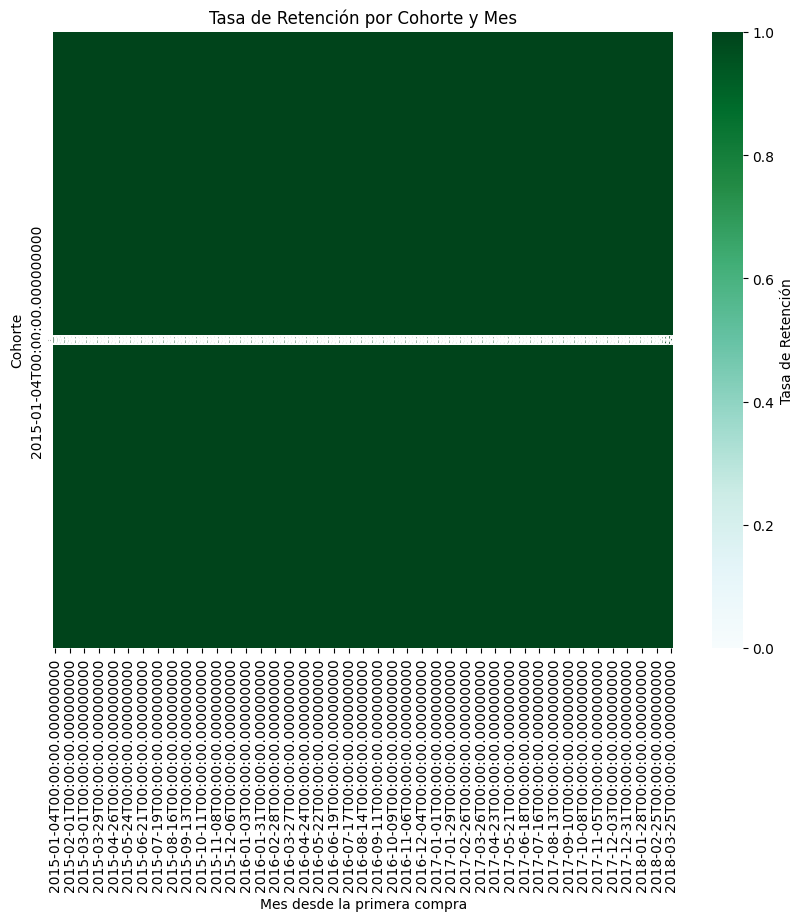

In [317]:
# Calcular el mes de la primera compra de cada cliente y asignarlo como la Cohorte
avo_local['Cohorte'] = avo_local.groupby('region')['Date'].transform('min')
display(avo_local.head())

# Calcular la cantidad de clientes de cada cohorte en cada mes
cohort_sizes_monthly = avo_local.groupby(['Cohorte', 'Date']).agg(Num_Clientes=('region','nunique')).reset_index()
display(cohort_sizes_monthly)
# Calcular la cantidad de clientes en la primera compra de cada cohorte
cohort_sizes_initial = cohort_sizes_monthly.groupby('Cohorte').first()
display(cohort_sizes_initial)

# Calcular la tasa de retención
retention = cohort_sizes_monthly.pivot(index='Cohorte', columns='Date', values='Num_Clientes').divide(cohort_sizes_initial['Num_Clientes'], axis=0)
display(retention)

# Graficar la tasa de retención
plt.figure(figsize=(10, 8))
plt.title('Tasa de Retención por Cohorte y Mes')
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1.0,
cmap='BuGn', cbar_kws={'label': 'Tasa de Retención'})
plt.xlabel('Mes desde la primera compra')
plt.xticks(rotation=90)
plt.ylabel('Cohorte')
plt.show()

### 5. **Análisis de Correlación y Regresión**
**Resumen:** Se centra en la identificación de relaciones significativas entre las variables numéricas y el desarrollo de modelos de regresión para hacer predicciones basadas en esas relaciones.

1. **Matriz de Correlación:** 
   - **Uso de Datos:** Utiliza las columnas numéricas del DataFrame (p. ej., `AveragePrice`, `Total Volume`, `4046`, `4225`, `4770`, `Total Bags`).
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Calcula la matriz de correlación usando el método `.corr()` del DataFrame.
     - Visualiza la matriz utilizando `sns.heatmap()`. 
     - Anota las correlaciones más significativas y discute su posible impacto en el análisis.



Se observa una alta correlación entre 'Total Volume' y ('Small Volume', 'Large Volume','XLarge Volume') lo que podría indicar (erroneamente) que las tres son una segmentación de Total Volume
Total Volume: $15523402593.400002 NO es la Suma de Small Volume, Large Volume y XLarge Volume: $11150188799.32 diferencia: $4373213794.080002


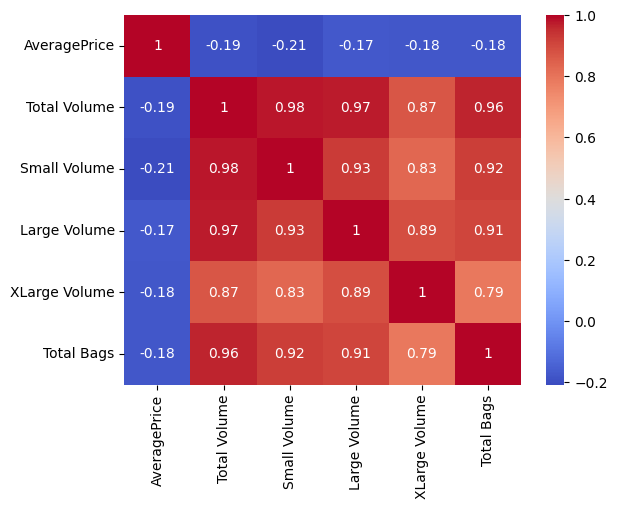

En el pair plot se observan cluesteres en la distribución entre las BAGS y el TOTALVOL


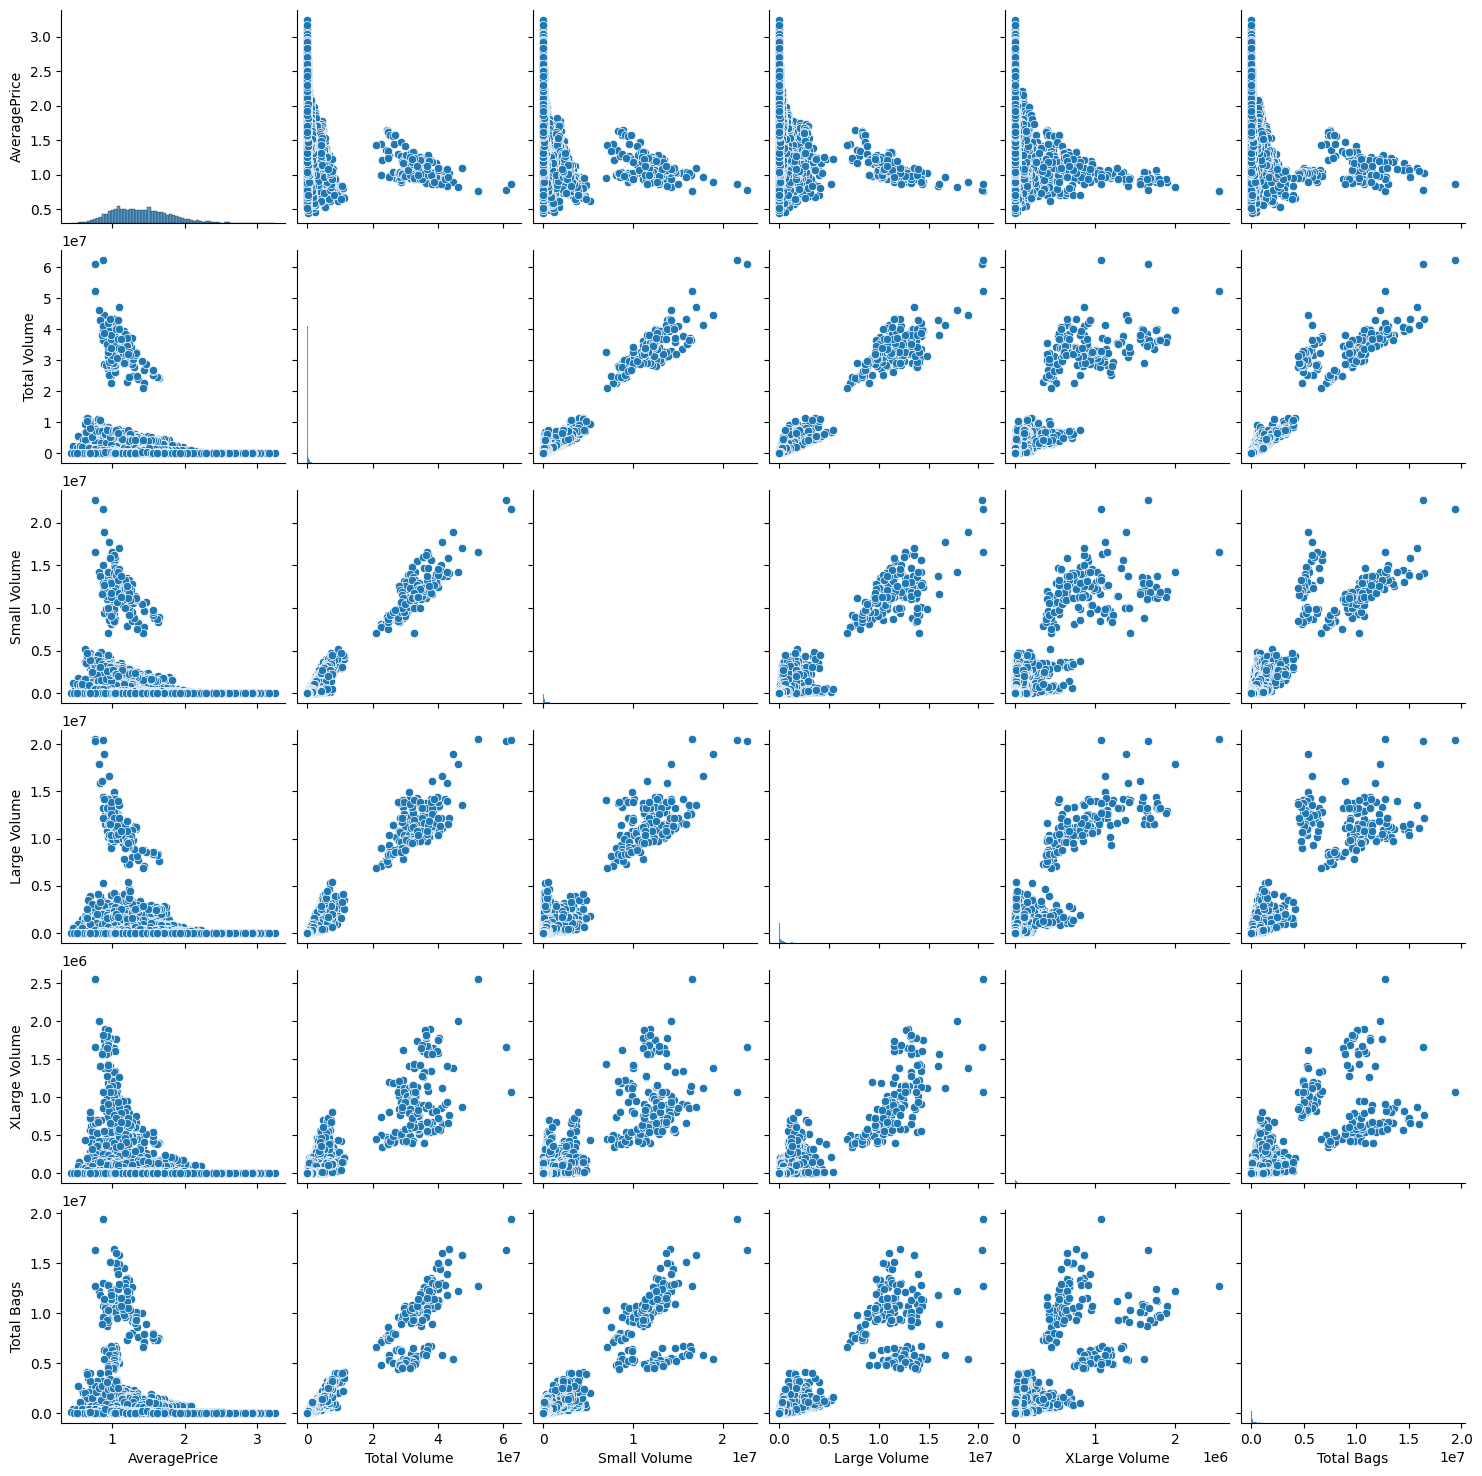

In [72]:
print("Se observa una alta correlación entre 'Total Volume' y ('Small Volume', 'Large Volume','XLarge Volume') lo que podría indicar (erroneamente) que las tres son una segmentación de Total Volume")

totalVol = avocado[['Total Volume']].sum().values[0]
smallVol = avocado[['Small Volume']].sum().values[0]
largeVol = avocado[['Large Volume']].sum().values[0]
xlargeVol = avocado[['XLarge Volume']].sum().values[0]

suma = smallVol + largeVol + xlargeVol
diff = totalVol - suma

print(f"Total Volume: ${totalVol} NO es la Suma de Small Volume, Large Volume y XLarge Volume: ${suma} diferencia: ${diff}")
avocado_volumes = avocado[['AveragePrice', 'Total Volume', 'Small Volume', 'Large Volume','XLarge Volume', 'Total Bags']]

sns.heatmap(avocado_volumes.corr(), cmap='coolwarm', annot=True)
plt.show()

print("En el pair plot se observan cluesteres en la distribución entre las BAGS y el TOTALVOL")

sns.pairplot(avocado_volumes)
plt.show()


In [73]:
avocado_volumes.corr()

,AveragePrice,Total Volume,Small Volume,Large Volume,XLarge Volume,Total Bags
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047
Small Volume,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057
Large Volume,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787
XLarge Volume,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000


2. **Análisis de Dispersión entre Variables Clave:** 
   - **Uso de Datos:** Selecciona variables numéricas de interés como `AveragePrice` y `Total Volume`.
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Crea un gráfico de dispersión con `sns.scatterplot()` para visualizar la relación entre `AveragePrice` y `Total Volume`.
     - Añade una línea de regresión utilizando `sns.regplot()` para ilustrar las tendencias.
     - Compara el ajuste de una regresión lineal frente a una polinómica.



3. **Predicciones Mensuales Usando Datos Trimestrales:**
   - **Uso de Datos:** Agrupa datos por trimestres y segmenta en meses utilizando `Date`, `AveragePrice`, y `Total Volume`.
   - **Esperado:** 
     - Convierte la columna `Date` a tipo datetime si es necesario.
     - Agrupa los datos por trimestre y calcula el promedio de `AveragePrice` y `Total Volume`.
     - Utiliza los datos de los primeros 2 meses de un trimestre para predecir el precio del tercer mes.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.



In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
from datetime import datetime

X_columns = ['Total Volume', 'Small Volume', 'Large Volume', 'XLarge Volume', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
predictions = []
actuals = []
for quarter in avocado['Quarter'].unique():
    # Seleccionar datos del trimestre actual
    year_data = avocado[avocado['Quarter'] == quarter]
    training_filter = year_data.Date.dt.month < year_data.Date.dt.month.max()
    test_filter = year_data.Date.dt.month == year_data.Date.dt.month.max()

    # Si hay al menos 2 registros, predecimos el tercero
    if len(year_data) >= 3:
        # entrenamos con los registros de los dos primeros meses, 
        X_train = year_data[training_filter][X_columns]
        y_train = year_data[training_filter]['AveragePrice']

        # Variables para el tercer mes
        X_test = year_data[test_filter][X_columns]
        y_test = year_data[test_filter][['Date', 'AveragePrice']].reset_index().copy()

        # Modelo de regresión lineal
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_test['AveragePrice_pred'] = model.predict(X_test)

        # Guardar predicciones y valores reales
        predictions.append(y_test.values.tolist())

# Evaluar precisión
predictions = pd.DataFrame(predictions[0])
predictions.columns = ['id','Date','AveragePrice','AveragePrice_pred']
r2 = r2_score(predictions['AveragePrice'], predictions['AveragePrice_pred'])
rmse = root_mean_squared_error(predictions['AveragePrice'], predictions['AveragePrice_pred']).item()
display("predictions", predictions, "r2", r2, "rmse", rmse)


'predictions'

,id,Date,AveragePrice,AveragePrice_pred
0,0,2015-12-27,1.33,1.379394
1,1,2015-12-20,1.35,1.379646
2,2,2015-12-13,0.93,1.378851
3,3,2015-12-06,1.08,1.378856
4,52,2015-12-27,0.99,1.341055
...,...,...,...,...
426,11832,2015-12-13,1.16,1.385512
427,11833,2015-12-06,1.39,1.380640
428,11882,2015-12-27,1.81,1.379112
429,11883,2015-12-20,1.92,1.379023


'r2'

0.04245746929500305

'rmse'

0.35806881645211674

4. **Predicciones Trimestrales:**
   - **Uso de Datos:** Agrupa los datos en trimestres usando solo variables numéricas.
   - **Esperado:** 
     - Agrupa los datos por trimestres usando `pd.Grouper()` con `freq='Q'` para obtener promedios.
     - Usa los datos de 1 o 2 trimestres anteriores para predecir el siguiente trimestre ajustando modelos de regresión lineal y polinómica.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.



5. **Predicciones Anuales:**
   - **Uso de Datos:** Agrupa los datos en años, utilizando únicamente columnas numéricas.
   - **Esperado:** 
     - Agrupa los datos por año utilizando `pd.Grouper()` con `freq='Y'`.
     - Usa los datos de 1 o 2 años anteriores para predecir el siguiente año ajustando modelos de regresión lineal y polinómica.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.



In [84]:
from sklearn.preprocessing import PolynomialFeatures

def linear_price_of_year(df, year, X_columns, poly_degree=2):

    # Seleccionar datos del año anterior para predecir
    training_filter = df.year == str(year - 1)
    test_filter = df.year == str(year)

    # entrenamos con los registros de los dos primeros meses, 
    X_train = df[training_filter][X_columns]
    y_train = df[training_filter]['AveragePrice']

    if(poly_degree > 0):
        poly_features = PolynomialFeatures(degree=poly_degree)
        X_train = poly_features.fit_transform(X_train)

    # Variables para el tercer mes
    X_test = df[test_filter][X_columns]
    y_test = df[test_filter][['Date', 'AveragePrice']].reset_index().copy()

    # Modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_test['AveragePrice_pred'] = model.predict(X_test)

    r2 = r2_score(y_test['AveragePrice'], y_test['AveragePrice_pred'])
    rmse = root_mean_squared_error(y_test['AveragePrice'], y_test['AveragePrice_pred']).item()

    return y_test, r2, rmse


In [86]:
avocado['year'] = avocado.Date.dt.to_period('Y')
X_columns = ['Total Volume', 'Small Volume', 'Large Volume', 'XLarge Volume', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']

for i in range(2016, 2019):
    results, r2, rmse = linear_price_of_year(avocado, i, X_columns, 2)
    gr = results.groupby(results.Date.dt.year).mean()
    display("predictions", gr, "r2", r2, "rmse", rmse)




/home/daimler/workspaces/data-science-uoc/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 8 features, but LinearRegression is expecting 45 features as input.

6. **Desarrollo de Modelos de Regresión Múltiple:** 
   - **Uso de Datos:** Selecciona varias variables numéricas como `Total Volume`, `4046`, `4225`, `4770`, y `Total Bags` para predecir `AveragePrice`.
   - **Esperado:** 
     - Define las variables independientes (X) y dependientes (y).
     - Ajusta modelos de regresión múltiple.
     - Compara su rendimiento utilizando métricas como R² y RMSE y discute las implicaciones de los resultados.



7. **Análisis de Coeficientes de Regresión Múltiple:**
   - **Uso de Datos:** Examina los coeficientes de los modelos de regresión múltiple ajustados.
   - **Esperado:** 
     - Extrae los coeficientes del modelo ajustado.
     - Interpreta los coeficientes para entender el impacto de cada variable numérica en `AveragePrice`.
     - Comenta sobre las variables más significativas y su relevancia.



8. **Modelos de Regresión para Diferenciar Volúmenes de Ventas:**
   - **Uso de Datos:** Usa `AveragePrice`, `Total Volume`, `4046`, `4225`, y `4770`.
   - **Esperado:** 
     - Ajusta modelos de regresión para analizar cómo los diferentes volúmenes de ventas afectan `AveragePrice`.
     - Compara los resultados de regresión lineal y polinómica.
     - Presenta las conclusiones de tus análisis.



9. **Análisis de la Influencia de las Ventas Totales en el Precio Promedio:**
   - **Uso de Datos:** Usa `Total Volume`, `AveragePrice`, y `Total Bags`.
   - **Esperado:** 
     - Ajusta un modelo de regresión lineal y polinómica para ver cómo varía `AveragePrice` en función del volumen total de ventas.
     - Evalúa la significancia de los coeficientes y discute su relevancia.



10. **Regresión para Predecir el Precio Promedio Según el Volumen de Aguacates por Tipo:**
    - **Uso de Datos:** Usa `AveragePrice`, `4046`, `4225`, `4770`, y `Total Volume`.
    - **Esperado:** 
      - Ajusta modelos de regresión lineal y polinómica.
      - Evalúa la efectividad de ambos modelos utilizando métricas como R² y RMSE.
      - Discute cuál modelo ofrece mejores predicciones y por qué, basándote en los resultados obtenidos.


